<a href="https://colab.research.google.com/github/jonathans1603/B-Cash/blob/main/25_fix_image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yohanams","key":"77c3f279751c275ded9af956b0a12084"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
#upload file kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                                  title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
teocalvo/teomewhy-loyalty-system                                     TeoMeWhy Loyalty System                           22MB  2024-06-17 11:29:46            182        377  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data       Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26           8199        146  1.0              
damirdizdarevic/uefa-euro-2024-players                               UEFA EURO 2024 - Players                          15KB  2024-06-08 18:07:29           1695         37  1.0              
rabieelkharoua/air-quality-and-health-impact-datas

In [7]:
! kaggle datasets download -d paramaggarwal/fashion-product-images-dataset

Dataset URL: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset
License(s): copyright-authors
100% 23.1G/23.1G [04:49<00:00, 33.4MB/s]
100% 23.1G/23.1G [04:49<00:00, 85.7MB/s]


In [8]:
! unzip fashion-product-images-dataset.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: fashion-dataset/styles/58128.json  
  inflating: fashion-dataset/styles/58129.json  
  inflating: fashion-dataset/styles/5813.json  
  inflating: fashion-dataset/styles/58131.json  
  inflating: fashion-dataset/styles/58132.json  
  inflating: fashion-dataset/styles/58133.json  
  inflating: fashion-dataset/styles/58135.json  
  inflating: fashion-dataset/styles/58136.json  
  inflating: fashion-dataset/styles/58137.json  
  inflating: fashion-dataset/styles/58138.json  
  inflating: fashion-dataset/styles/58139.json  
  inflating: fashion-dataset/styles/5814.json  
  inflating: fashion-dataset/styles/58140.json  
  inflating: fashion-dataset/styles/58141.json  
  inflating: fashion-dataset/styles/58143.json  
  inflating: fashion-dataset/styles/58144.json  
  inflating: fashion-dataset/styles/58145.json  
  inflating: fashion-dataset/styles/58146.json  
  inflating: fashion-dataset/styles/58147.json  
  inflating:

#Importing Libraries


In [9]:
#librarynya blm lengkap ya masih pake yang sekiranya perlu dulu
#ntar tambahin aja
import pandas as pd
import numpy as np
import os
import seaborn as sns
import shutil
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import plotly.express as px
import zipfile
import tensorflow as tf
import urllib.request
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from os import listdir
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [28]:
base_dir = '/content/fashion-dataset'
image_files_dir = os.path.join(base_dir, 'images')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [22]:
# Menghapus direktori train, validation, dan test jika sudah ada
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(validation_dir):
    shutil.rmtree(validation_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Membuat ulang direktori train, validation, dan test
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

BATASSSSS

In [29]:
styles = pd.read_csv("/content/fashion-dataset/styles.csv", on_bad_lines='skip')
styles['filename'] = styles['id'].astype(str) + '.jpg'
styles = styles.dropna()
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


In [30]:
# Filter hanya subkategori "Apparel"
styles = styles[styles['masterCategory'] == 'Apparel']

# Menghapus baris dengan nilai yang hilang
styles = styles.dropna()
print(styles.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   
5   1855    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName   filename  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012.0  Casual             Peter England Men Party Blue Jeans  39386.jpg  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012.0  Casual                          Puma Men Grey T-shirt  53759.jpg  
5  2011.0  Casual           Inkfruit Mens Chain Reaction T-shirt   1855.jpg  


In [26]:
image_files_dir = '/content/fashion-dataset/fashion-dataset/images.csv'
styles['present'] = styles['filename'].apply(lambda x: os.path.exists(os.path.join(image_files_dir, x)))
styles = styles[styles['present']].reset_index(drop=True)

In [31]:
desired_article_types = ['Tshirts', 'Jeans', 'Dresses', 'Jackets', 'Shirts', 'Tops', 'Sweaters', 'Skirts']
filtered_styles = styles[styles['articleType'].isin(desired_article_types)]

In [32]:
# Menghitung jumlah artikel per tipe artikel
article_type_counts = filtered_styles['articleType'].value_counts()
valid_article_types = article_type_counts[article_type_counts >= 2].index
filtered_styles = filtered_styles[filtered_styles['articleType'].isin(valid_article_types)]

# Membagi dataset menjadi set pelatihan, validasi, dan pengujian
train_data, temp_data = train_test_split(filtered_styles, test_size=0.3, stratify=filtered_styles['articleType'], random_state=42)

temp_data_article_counts = temp_data['articleType'].value_counts()
valid_temp_article_types = temp_data_article_counts[temp_data_article_counts >= 2].index
temp_data = temp_data[temp_data['articleType'].isin(valid_temp_article_types)]

# Membagi temp_data menjadi set validasi dan pengujian
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['articleType'], random_state=42)

# Membuat subdirektori berdasarkan articleType
for article_type in desired_article_types:
    os.makedirs(os.path.join(train_dir, article_type), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, article_type), exist_ok=True)
    os.makedirs(os.path.join(test_dir, article_type), exist_ok=True)

# Fungsi untuk memindahkan file
def move_files(data, target_dir):
    for _, row in data.iterrows():
        src_path = os.path.join(image_files_dir, row['filename'])
        dst_path = os.path.join(target_dir, row['articleType'], row['filename'])
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# Memindahkan gambar ke folder train, validation, dan test
move_files(train_data, train_dir)
move_files(val_data, validation_dir)
move_files(test_data, test_dir)

In [33]:
#mengurangi ukurannya karena terlalu besar
IMAGE_SIZE = (150,150)
BATCH_SIZE = 32

# ##pakai ini untu yg lebih kecil
# IMAGE_SIZE = (64,64)
# BATCH_SIZE = 16

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_set = val_datagen.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 9636 images belonging to 8 classes.
Found 2066 images belonging to 8 classes.
Found 2065 images belonging to 8 classes.


In [35]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=[IMAGE_SIZE[0], IMAGE_SIZE[1], 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=len(desired_article_types), activation='softmax'))

cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
cnn.fit(
    training_set,
    steps_per_epoch=training_set.samples // BATCH_SIZE,
    validation_data=validation_set,
    validation_steps=validation_set.samples // BATCH_SIZE,
    epochs=15
)

Epoch 1/15
301/301 [==============================] - 861s 3s/step - loss: 1.0048 - accuracy: 0.6585 - val_loss: 0.6230 - val_accuracy: 0.7710
Epoch 2/15
301/301 [==============================] - 908s 3s/step - loss: 0.5499 - accuracy: 0.8074 - val_loss: 0.4609 - val_accuracy: 0.8281
Epoch 3/15
301/301 [==============================] - 848s 3s/step - loss: 0.4579 - accuracy: 0.8316 - val_loss: 0.3920 - val_accuracy: 0.8589
Epoch 4/15
301/301 [==============================] - 892s 3s/step - loss: 0.4091 - accuracy: 0.8471 - val_loss: 0.3754 - val_accuracy: 0.8623
Epoch 5/15
301/301 [==============================] - 902s 3s/step - loss: 0.3784 - accuracy: 0.8612 - val_loss: 0.3663 - val_accuracy: 0.8716
Epoch 6/15
301/301 [==============================] - 903s 3s/step - loss: 0.3558 - accuracy: 0.8683 - val_loss: 0.3261 - val_accuracy: 0.8872
Epoch 7/15
301/301 [==============================] - 899s 3s/step - loss: 0.3337 - accuracy: 0.8722 - val_loss: 0.3389 - val_accuracy: 0.8779

In [37]:
cnn.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
cnn.save('cnn_model.h5')

loaded_model = tf.keras.models.load_model('cnn_model.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

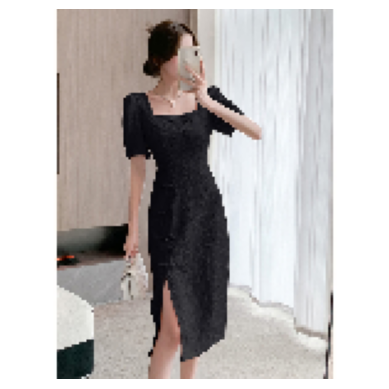

1/1 [==============================] - 0s 37ms/step
Prediksi: Dresses


In [49]:
## UJI GAMBAR

import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path gambar uji
img_path = '/content/fashion-dataset/dress1.jpg'

img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

predictions = cnn.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
class_labels = list(training_set.class_indices.keys())
predicted_label = class_labels[predicted_class[0]]

print(f'Prediksi: {predicted_label}')